In [22]:
import numpy as np
import pandas as pd

In [23]:
import os
import sys

In [24]:
import skvideo.io

In [25]:
VIDEO_DIR = '../../video/raw'
LABEL_DIR = 'data'

In [26]:
possible_vids = set(os.listdir(VIDEO_DIR))

In [27]:
possible_labels = set(os.listdir(LABEL_DIR))

In [28]:
for vid in possible_vids:
    if (vid + '.csv') in possible_labels:
        print('{} is good to use'.format(vid))

VID_20180325_143338.mp4 is good to use


In [40]:
def load_data(vid_name):

    vid_file_name = VIDEO_DIR + '/' + vid_name
    lab_file_name = LABEL_DIR + '/' + vid_name + '.csv'
    
    print('fetching ' + lab_file_name)
    lab_data = pd.read_csv(lab_file_name, sep=',').values[:,1:]
        
    vid_data = skvideo.io.vread(vid_file_name)
    vid_mem_size = sys.getsizeof(vid_data)/10**9
    print('loaded video sized {}gb'.format(vid_mem_size))
    
    
    
    assert(len(vid_data) == len(lab_data))
    
    return vid_data, lab_data
        

In [45]:
def get_all_data(vid_names):
    
    all_vids = None
    all_labs = None
    
    for vid_name in vid_names:
        
        if all_vids is None:
            all_vids, all_labs = load_data(vid_name)
        else:
            t_v, t_l = load_data(vid_name)
            all_vids = np.concatenate(all_vids, t_v)
            all_labs = np.concatenate(all_labs, t_l)
            del t_v, t_l
    
    assert(len(all_vids) == len(all_labs))
    
    return all_vids, all_labs
            

In [46]:
from skimage.transform import resize

In [72]:
def rgb_to_gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def resize_images(data, factor, verbose=True):
    # shrink 2nd and 3rd dimentions (height and width)     
    new_shape = [int(dim/factor) if (i in [1,2]) else dim 
                 for i, dim in enumerate(data.shape)]
    
    resized_images = np.zeros(new_shape)
    
    for i in range(len(data)):
        resized_images[i] = resize(data[i], 
                                   output_shape=new_shape[1:])
        if verbose and (i % 200) == 0:
            print('compressed {} images'.format(i))
            
    return resized_images
    

def transform_data(data, 
                   crop_height=None, 
                   grayscale=True, 
                   resize_shrink_factor=5, 
                   sample=False,
                   verbose=True):
    
    output = data[:10] if sample else data
    
    if crop_height:
        if verbose:
            print('cropping...')
        curr_shape = output.shape
        output = output[:,crop_height[0]:crop_height[1]]
        
    if resize_shrink_factor != 1:
        if verbose:
            print('resizing...')
        output = resize_images(output, resize_shrink_factor)

    if grayscale:
        if verbose:
            print('grayscaling..')
        output = rgb_to_gray(output)  
    
    if verbose:
        print('..done')
        
    return output
    
    

In [48]:
x,y = get_all_data(['VID_20180325_143338.mp4'])

fetching data/VID_20180325_143338.mp4.csv
loaded video sized 1.384128144gb


In [77]:
sys.getsizeof(x)/10**9, sys.getsizeof(comp_data)/10**9

(1.384128144, 0.061516928)

In [73]:
comp_data = transform_data(x, crop_height=[150,350])

cropping...
resizing...
compressed 0 images
compressed 200 images
compressed 400 images
compressed 600 images
compressed 800 images
compressed 1000 images
compressed 1200 images
grayscaling..
..done


In [65]:
comp_data.shape

(1335, 20, 144)

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

In [55]:
def display_image_with_label(img, label):
    height, width = img.shape[0:2]
    plt.imshow(img)
    plt.axvline(label[0] * width, c='b')
    plt.axhline(label[1] * height, c='r')
    plt.show()

def show_sample_images_with_labels(images, labels, n=5):
    
    random_frame_indixes = np.random.randint(0, high=len(images), size=n)

    for index in random_frame_indixes:
        display_image_with_label(images[index], labels[index])

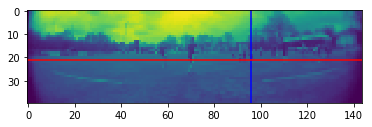

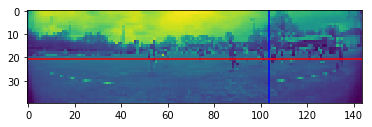

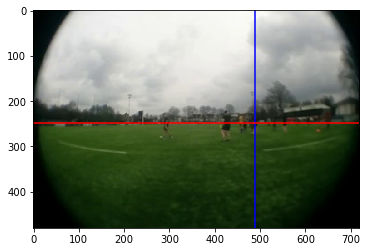

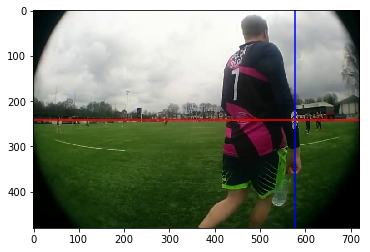

In [74]:
show_sample_images_with_labels(comp_data, y, n=2)
show_sample_images_with_labels(x, y, n=2)

In [38]:
pd.read_csv('data/VID_20180325_143338.mp4.csv', sep=',')

,Unnamed: 0,x,y
0,0,0.837500,0.745833
1,1,0.819444,0.468750
2,2,0.794444,0.485417
3,3,0.777778,0.506250
4,4,0.754167,0.516667
5,5,0.747222,0.522917
6,6,0.755556,0.510417
7,7,0.755556,0.510417
8,8,0.755556,0.510417
9,9,0.755556,0.510417


In [39]:
'data/VID_20180325_143338.mp4.csv' == 'data/VID_20180325_144520.mp4.csv'

False

In [18]:
[int(dim/5)if (i in [1,2]) else dim for i,dim in enumerate([1,10,100,1000,1000])]

[1, 2, 20, 1000, 1000]